### auto mpg

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import tensorflow as tf 
%matplotlib inline
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/neural network UNP/auto_mpg.csv")

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
df_1 = df.drop(["car name","model year","origin"], axis = 1, inplace = True )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 18.8+ KB


In [ ]:
(df["horsepower"] == '?').sum()

6

In [ ]:
df = df[df.horsepower != "?"]

In [ ]:
(df["horsepower"] == '?').sum()

0

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6
394,44.0,4,97.0,52,2130,24.6
395,32.0,4,135.0,84,2295,11.6
396,28.0,4,120.0,79,2625,18.6


In [ ]:
df.horsepower  = df["horsepower"]. astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
dtype: object

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


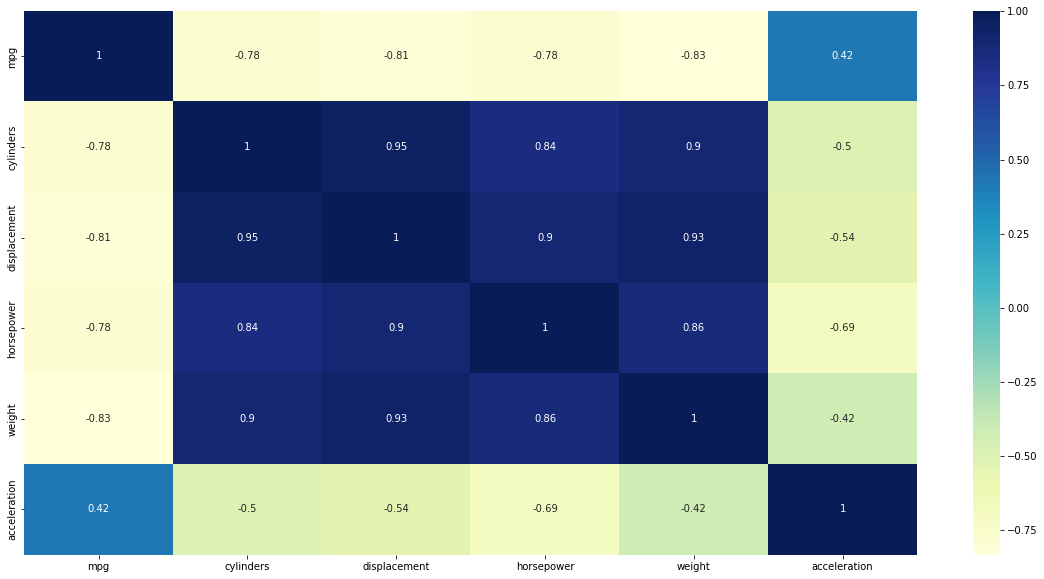

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr() , annot = True, cmap = "YlGnBu")

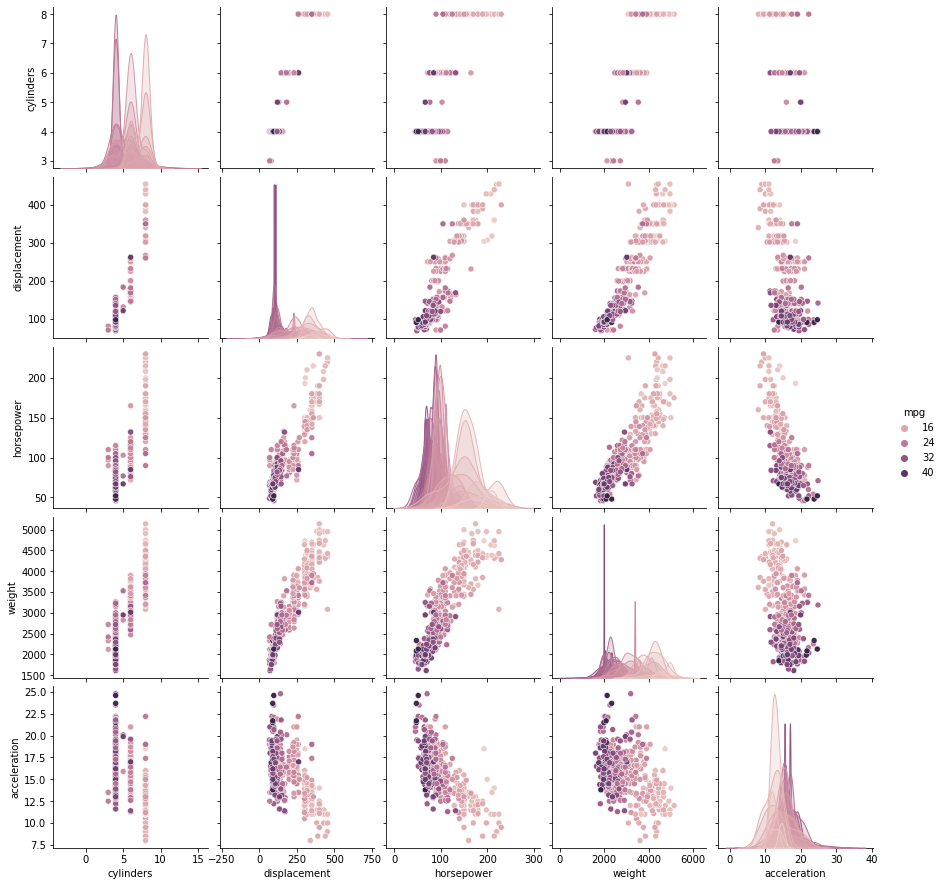

In [ ]:
sns.pairplot(df, hue="mpg")

### Test cases

In [ ]:
x = df.drop("mpg", axis = 1)
y = df["mpg"]

In [ ]:
x

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130,3504,12.0
1,8,350.0,165,3693,11.5
2,8,318.0,150,3436,11.0
3,8,304.0,150,3433,12.0
4,8,302.0,140,3449,10.5
...,...,...,...,...,...
393,4,140.0,86,2790,15.6
394,4,97.0,52,2130,24.6
395,4,135.0,84,2295,11.6
396,4,120.0,79,2625,18.6


In [ ]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

### test size = 0.2

In [ ]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size =  0.2, random_state  = 22)

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr=0.005),
              metrics= ["mae"])





/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
mod_1 = model.fit(x_train, y_train, epochs= 100, verbose=0)
mod_1

In [ ]:
model.evaluate(x_train,y_train)

10/10 [==============================] - 0s 2ms/step - loss: 4.5624 - mae: 4.5624


[4.562358379364014, 4.562358379364014]

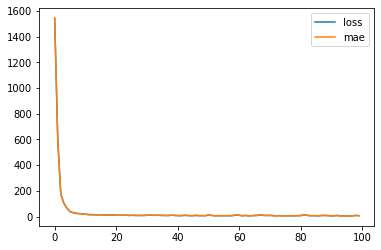

In [ ]:
pd.DataFrame(mod_1.history).plot()

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model_S= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model_S.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(lr=0.005),
              metrics= ["mae"])





/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
mod_S = model_S.fit(x_train, y_train, epochs= 100, verbose=0)
mod_S

In [ ]:
model_S.evaluate(x_train,y_train)

10/10 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

### Test size = 0.25

In [ ]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size =  0.25, random_state  = 22)

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model_2= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model_2.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr=0.005),
              metrics= ["mae"])





/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
mod_2 = model.fit(x_train, y_train, epochs= 100, verbose=0)
mod_2

In [ ]:
model.evaluate(x_train,y_train)

10/10 [==============================] - 0s 3ms/step - loss: 4.2601 - mae: 4.2601


[4.260085582733154, 4.260085582733154]

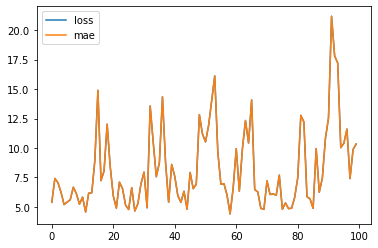

In [ ]:
pd.DataFrame(mod_2.history).plot()

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model_S= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model_S.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(lr=0.005),
              metrics= ["mae"])





/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
mod_S2 = model_S.fit(x_train, y_train, epochs= 100, verbose=0)
mod_S2

In [ ]:
model_S.evaluate(x_test,y_test)

4/4 [==============================] - 0s 8ms/step - loss: nan - mae: nan


[nan, nan]

### Experimentation 

In [ ]:
x = df.drop("mpg", axis = 1)
y = df["mpg"]

In [ ]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size =  0.3, random_state  = 22)

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model

model.compile(loss=
              tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr=0.005),
              metrics= ["mae"])


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, epochs= 400, verbose=0)


In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 4.2779 - mae: 4.2779


[4.277851104736328, 4.277851104736328]

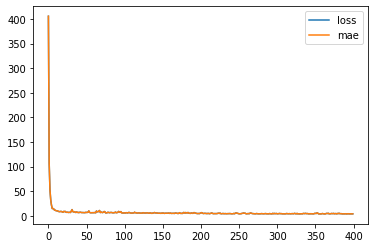

In [ ]:
pd.DataFrame(history.history).plot()